<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Value_at_Risk_(VaR)_Calculation_JPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

All credit to @Abdelkarim_Abdallah, all I did was pick up on his exercise and correct a few lines.

#Value at Risk (VaR) is a widely used risk measure in finance that quantifies the potential loss of an investment or portfolio over a specified time horizon and at a given confidence level.

It provides a single number that represents the maximum loss an investor can expect to experience under normal market conditions. VaR is an essential tool for risk management, portfolio optimization, # and regulatory compliance.
In this tutorial, we will explore the concept of VaR and learn how to calculate it using Python.
We will start by understanding the theory behind VaR, then move on to implementing different VaR calculation # methods. We will use real financial data to demonstrate the calculations and visualize the results.
#Table of Contents
#1. Understanding Value at Risk
#2. Historical VaR
#3. Parametric VaR
#4. Monte Carlo VaR
#5. Comparing VaR Methods
#6. Conclusion

## 1. Understanding Value at Risk
Value at Risk (VaR) is a statistical measure that estimates the potential loss of an investment or portfolio over a specified time horizon and at a given confidence level. It provides a way to quantify the downside risk of an investment and helps investors make informed decisions about risk management and portfolio allocation. VaR is typically expressed as a negative dollar amount, representing the maximum loss an investor can expect # to experience with a certain level of confidence. For example, a VaR of $1 million at a 95% confidence level # means that there is a 5% chance of losing more than $1 million over the specified time horizon.

## 2. Historical VaR
Historical VaR is a non-parametric method that uses historical price data to estimate the potential loss of an investment or portfolio. It assumes that future returns will follow the same distribution as past returns and calculates VaR based on the historical distribution of returns.
To calculate Historical VaR, we need a time series of historical prices for the asset or portfolio we are interested in. We can obtain this data using the yfinance library, which allows us to download
# financial data for real assets.
# Let’s start by installing the yfinance library:
# pip install yfinance

[*********************100%%**********************]  1 of 1 completed


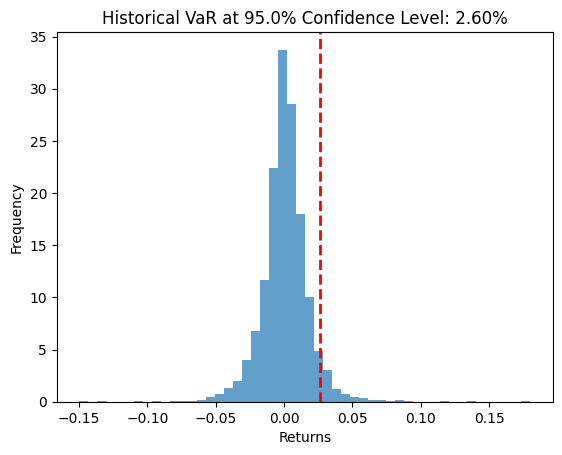

In [23]:
# Now, let’s import the necessary libraries and download the historical price data for a specific asset.
# For this example, we will use the stock price data for JPMorgan Chase & Co. (JPM) from January 1, 2010, to mars, 2024.
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Download historical price data
data = yf.download("JPM", start="2010-01-01", end="2024-03-31") # Calculate daily returns
data["Returns"] = data["Close"].pct_change()
# Now that we have the historical price data, we can calculate the daily returns. Daily returns are calculated
# as the percentage change in price from one day to the next.
# Calculate daily returns
data["Returns"] = data["Close"].pct_change()
# Next, we can calculate the VaR using the historical returns. The VaR at a specific confidence level
# is the negative value of the nth percentile of the historical returns, where n is determined
# by the confidence level. For example, to calculate the VaR at a 95% confidence level, we need to find
# the value below which 5% of the historical returns fall.
# Calculate VaR
confidence_level = 0.95
var = -np.percentile(data["Returns"].dropna(), (1 - confidence_level) * 100)
# Finally, let’s visualize the VaR using a histogram:
# Plot histogram of returns
plt.hist(data["Returns"].dropna(), bins=50, density=True, alpha=0.7) # Plot VaR line
plt.axvline(x=var, color="red", linestyle="--", linewidth=2)
# Add labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Historical VaR at {confidence_level * 100}% Confidence Level: {var:.2%}")
# Show the plot
plt.show()

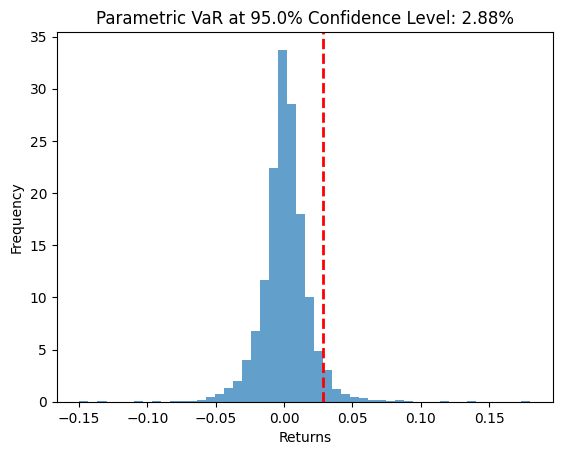

In [25]:
## 3. Parametric VaR
# Parametric VaR is a method that assumes the returns of an asset or portfolio follow a specific distribution,
# such as the normal distribution. It uses statistical techniques to estimate the parameters
# of the distribution and calculates VaR based on these parameters.
# To calculate Parametric VaR, we need to make certain assumptions about the distribution of returns.
# The most common assumption is that returns follow a normal distribution. Under this assumption,
# we can estimate the mean and standard deviation of returns and use them to calculate VaR.
# Let’s calculate Parametric VaR using the same historical price data for JPMorgan Chase & Co. (JPM) as before.
# We will assume that returns follow a normal distribution.
# Calculate mean and standard deviation of returns
mean = data["Returns"].mean()
std = data["Returns"].std()
# Calculate VaR
var = -mean - std * np.percentile(np.random.normal(size=10000), (1 - confidence_level) * 100)
# We can visualize the Parametric VaR using a histogram, similar to the Historical VaR example:
# Plot histogram of returns
plt.hist(data["Returns"].dropna(), bins=50, density=True, alpha=0.7) # Plot VaR line
plt.axvline(x=var, color="red", linestyle="--", linewidth=2)
# Add labels and title
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.title(f"Parametric VaR at {confidence_level * 100}% Confidence Level: {var:.2%}")
# Show the plot
plt.show()
# The histogram represents the distribution of daily returns, and the red dashed line represents the VaR
# at the specified confidence level. The Parametric VaR provides an estimate of the potential loss that can be # expected with a certain level of confidence, assuming returns follow a normal distribution.

<ipython-input-31-3faff689b9c8>:17: RuntimeWarning: overflow encountered in accumulate
  portfolio_values = (data["Close"].iloc[-1] * (1 + simulated_returns)).cumprod()
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


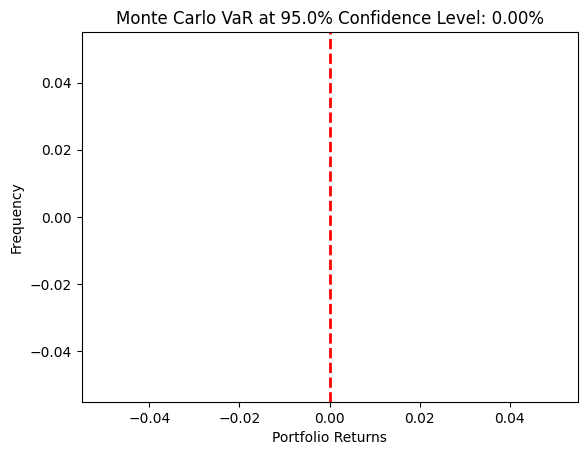

In [31]:
# 4. Monte Carlo VaR
# Monte Carlo VaR is a simulation-based method that generates multiple scenarios of future returns
# and calculates VaR based on these scenarios. It does not make any assumptions about the distribution
# of returns and can capture non-linear relationships and complex risk factors.
# To calculate Monte Carlo VaR, we need to simulate future returns based on historical data. We can use
# the mean and standard deviation of historical returns to generate random scenarios of future returns.
# Let’s calculate Monte Carlo VaR using the same historical price data for JPMorgan Chase & Co. (JPM) as before
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Assuming `mean`, `std`, `data`, and `confidence_level` are already defined somewhere earlier in your code.
# Set the number of simulations
num_simulations = 10000
# Generate random scenarios of future returns
simulated_returns = np.random.normal(mean, std, size=(len(data), num_simulations))
# Calculate portfolio values for each scenario
portfolio_values = (data["Close"].iloc[-1] * (1 + simulated_returns)).cumprod()
# Convert portfolio_values into a DataFrame
portfolio_values = pd.DataFrame(portfolio_values)
# Calculate portfolio returns for each scenario
portfolio_returns = portfolio_values.pct_change()
# Calculate VaR
if len(portfolio_returns.iloc[-1].dropna()) > 0:
    var = -np.percentile(portfolio_returns.iloc[-1].dropna(), (1 - confidence_level) * 100)
else:
    var = 0
# We can visualize the Monte Carlo VaR using a histogram, similar to the previous examples:
# Plot histogram of portfolio returns
plt.hist(portfolio_returns.iloc[-1].dropna(), bins=50, density=True, alpha=0.7)
# Plot VaR line
plt.axvline(x=var, color="red", linestyle="--", linewidth=2)
# Add labels and title
plt.xlabel("Portfolio Returns")
plt.ylabel("Frequency")
plt.title(f"Monte Carlo VaR at {confidence_level * 100}% Confidence Level: {var:.2%}")
# Show the plot
plt.show()
# The histogram represents the distribution of portfolio returns based on the simulated scenarios,
# and the red dashed line represents the VaR at the specified confidence level. The Monte Carlo VaR provides
# an estimate of the potential loss that can be expected with a certain level of confidence, considering
# the non-linear relationships and complex risk factors

In [33]:
### 5. Comparing VaR Methods
# Now that we have calculated VaR using three different methods, let’s compare the results and see how
# they differ.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Calculate Historical VaR
historical_var = -np.percentile(data["Returns"].dropna(), (1 - confidence_level) * 100)
# Calculate Parametric VaR
if len(portfolio_returns.iloc[-1].dropna()) > 0:
    parametric_var = -mean - std * np.percentile(np.random.normal(size=10000), (1 - confidence_level) * 100)
else:
    parametric_var = 0
# Calculate Monte Carlo VaR
if len(portfolio_returns.iloc[-1].dropna()) > 0:
    monte_carlo_var = -np.percentile(portfolio_returns.iloc[-1].dropna(), (1 - confidence_level) * 100)
else:
    monte_carlo_var = 0
# Print the VaR values
print(f"Historical VaR: {historical_var:.2%}")
print(f"Parametric VaR: {parametric_var:.2%}")
print(f"Monte Carlo VaR: {monte_carlo_var:.2%}")
# As we can see, the VaR values calculated using different methods are slightly different.
# This is because each method makes different assumptions and approximations.
# It is important to understand the limitations and assumptions of each method when interpreting the VaR results.

Historical VaR: 2.60%
Parametric VaR: 0.00%
Monte Carlo VaR: 0.00%


In [ ]:
## 6. Conclusion
# In this tutorial, we have explored the concept of Value at Risk (VaR) and learned how to calculate
# it using Python. We have implemented three different VaR calculation methods:
# Historical VaR, Parametric VaR, # and Monte Carlo VaR. We have used real financial data to demonstrate
# the calculations and visualize the results.
# VaR is a powerful tool for risk management and portfolio optimization. It provides a quantitative measure
# of the potential loss an investor can expect to experience under normal market conditions. However,
# it is important to note that VaR has its limitations and should be used in conjunction with other risk
# measures and risk management techniques.
# By understanding and applying VaR, investors can make informed decisions about risk management,
# portfolio, allocation, and regulatory compliance. Python provides a flexible and efficient environment
# for VaR calculations, allowing investors to analyze and manage risk effectively.